In [66]:
import pandas as pd
import matplotlib.pyplot as plt


df= pd.read_csv(r"C:\Users\seanr\Desktop\Projects\unsupervised machine learning\SpotifyFeatures.csv")
df.head()



,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [67]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [68]:
#SINCE THAT DATESET IS TOO LARGE, WE TAKE A SUBSET OF ORIGINAL DATA

df=df.iloc[0:10000,:]

df_copy=df.iloc[:,:]

In [69]:
# DROPPING THE COLUMNS WHICH ARE NOT USEFUL IN CREATING CLUSTERS

df.drop(["genre","artist_name","track_name","track_id","popularity","time_signature"],axis=1,inplace=True)
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

In [70]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,0.814
1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,0.227
4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,0.390


In [71]:
# CREATING DUMMY VARIABLES FOR CATEGORICAL FEATURES


MODE =pd.get_dummies(df["mode"],drop_first=True)
KEY =pd.get_dummies(df["key"],drop_first=True)

df=pd.concat([df,MODE,KEY],axis=1)
df=df.drop(["mode","key"],axis=1)

df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,B,C,C#,D,D#,E,F,F#,G,G#
0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814,...,0,0,1,0,0,0,0,0,0,0
1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816,...,0,0,0,0,0,0,0,1,0,0
2,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368,...,0,1,0,0,0,0,0,0,0,0
3,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227,...,0,0,1,0,0,0,0,0,0,0
4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390,...,0,0,0,0,0,0,1,0,0,0


In [72]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'Minor', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#',
       'G', 'G#'],
      dtype='object')

In [73]:
#scaling values

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

df=scaler.fit_transform(df)


# DIMENTION REDUCTION

Since we have too many features we can try using Principal component analysis to reduce the number of features to 3 and check for results

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df)
PCA_df = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_df.head()

,col1,col2,col3
0,-0.214830,-0.105016,-0.057413
1,0.775538,-0.108177,0.014090
2,0.468967,1.107526,0.077047
3,-0.276156,0.487026,0.037135
4,-0.305783,0.921229,0.145266


In [11]:
# PLOTING ELBOW PLOT TO FIND BEST K VALUE aka number of clusters

C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\seanr\anaconda3\lib\site-packages\sklearn\clust

Text(0, 0.5, 'WCSS')

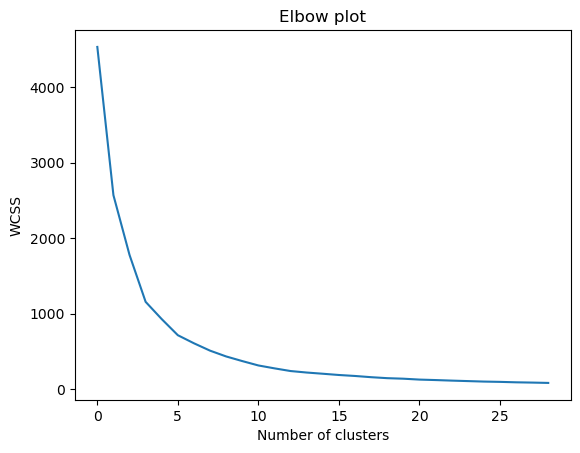

In [76]:
from sklearn.cluster import KMeans

wcss=[]                   #Within cluster sum of squares

for i in range(1,30):
    km=KMeans(n_clusters=i,init="k-means++")    # k means ++ initializes centroids as far as possible for each other 
    km.fit(PCA_df)
    wcss.append(km.inertia_)
    
plt.plot(wcss)  
plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

    

In [93]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=5,init="k-means++")
km.fit(PCA_df)


C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [94]:
# km.cluster_centers_

In [95]:
km.labels_

array([2, 0, 1, ..., 4, 0, 0])

In [79]:
print(km.labels_)

[5 0 6 ... 3 0 0]


# MODEL EVALUATION USING AVERAGE SILHOUETTE SCORE 

SILHOUETTE SCORE : Score ranging betweem 1 to -1 , 1 being a perfect score.

if b(i) > a(i) , then value we get score close to 1
where,
a(i)= mean distance between i and all other data points in a cluster, where i is the centroid of that cluster (ie average distance between centroid of cluster to all other points in that cluster

b(i)= mean distance of i from all other points in a different cluster(in simple terms shortest distance between one cluster to another cluster)

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [114]:
from sklearn.metrics import silhouette_score
import numpy as np


labels = km.fit_predict(PCA_df)

avg_score=silhouette_score(PCA_df,labels)

avg_score


C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.54758251076764

In [115]:
from sklearn.metrics import silhouette_samples

sample_scores = silhouette_samples(df,labels)

sample_scores




array([0.09704409, 0.1542446 , 0.02828258, ..., 0.44260858, 0.15667572,
       0.12869753])

# ADDING CLUSTER LABELS IN OUR ORIGINAL DATAFRAME

In [116]:
df_copy["cluster_label"]=labels

In [119]:
df_copy["cluster_label"].value_counts()

0    3662
1    2587
3    1835
4    1056
2     860
Name: cluster_label, dtype: int64

# ANALYSIS OF OUR CLUSTERING:

THUS 5 CLUSTERS HAVE BEEN FORMED ON OUR SPOITFY LISTNERS.BY ANALZING THESE CLUSTERS SPOITFY CAN MAKE PLAYLISTS OF SONGS THAT MATCH FEATURES LIKE LOUDNESS,ENERGY,VALENCE ETC FOR THESE CLUSTERS OF MUSIC LISTENERS AND CAN ALSO RECOMMEND SONGS THAT RELATE TO EACH CLUSTER 

# HIERARCHICAL CLUSTERING 

OUR DATASET IS TOO BIG TO PERFORM HIERARCHICAL CLUSTERING , HENCE WE WILL USE A SUBSET OF THE DATASET JUST FOR DEMONSTARION OF
HOW WE CAN USE HIERARCHICAL CLUSTERING 



In [36]:
df1=df.iloc[0:1000,:]
df1

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,B,C,C#,D,D#,E,F,F#,G,G#
0,0.611,0.389,99373,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814,...,0,0,1,0,0,0,0,0,0,0
1,0.246,0.590,137373,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816,...,0,0,0,0,0,0,0,1,0,0
2,0.952,0.663,170267,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368,...,0,1,0,0,0,0,0,0,0,0
3,0.703,0.240,152427,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227,...,0,0,1,0,0,0,0,0,0,0
4,0.950,0.331,82625,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.743,0.617,124307,0.664,0.000056,0.3090,-10.872,0.0379,100.826,0.884,...,0,0,0,0,0,0,0,0,0,0
996,0.136,0.790,235800,0.879,0.001180,0.0845,-5.698,0.0371,116.992,0.963,...,0,1,0,0,0,0,0,0,0,0
997,0.902,0.495,168067,0.243,0.000003,0.1460,-11.383,0.0563,141.636,0.389,...,0,0,0,0,0,0,0,0,0,0
998,0.232,0.685,188467,0.581,0.000000,0.1010,-6.179,0.0456,183.895,0.718,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
FIRST WE NEED TO PLOT A DENDOGRAM TO CHOOSE NUMBER OF CLUSTERS

RULE OF THUMB IS WE NEED TO FIND THE LONGEST VERTICAL LINE WHICH DOES NOT PASS THROUGH A HORIZONTAL LINE

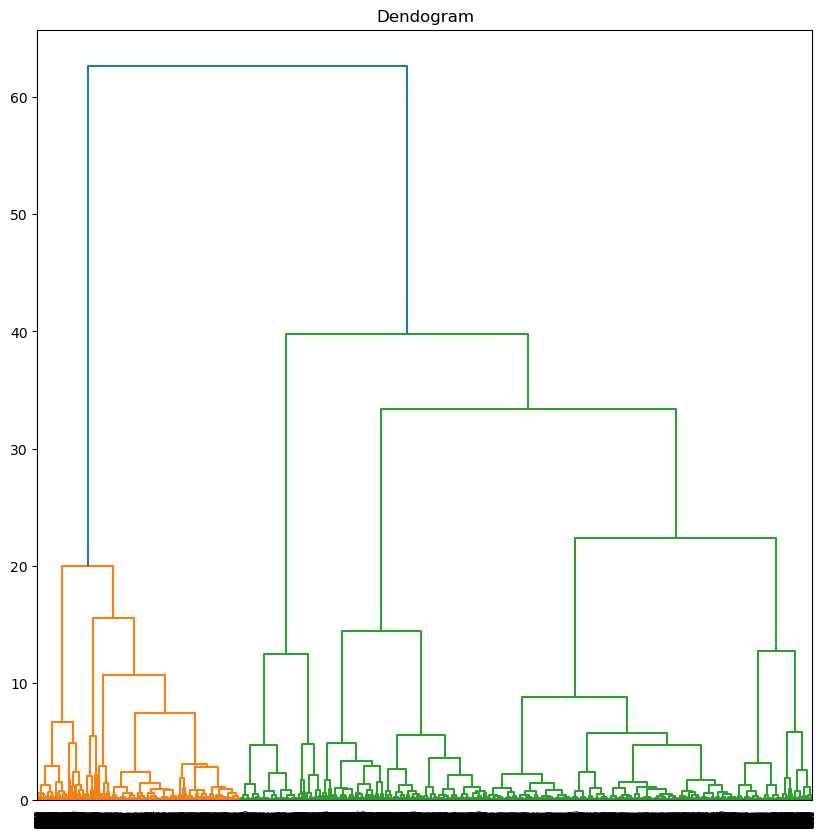

In [82]:
# HIERRARCHICAL CLUSTERING

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,10))

dendrogram=sch.dendrogram(sch.linkage(PCA_df,method="ward"))
plt.title("Dendogram")
plt.savefig('dendrogram1.png')

plt.show()


In [122]:
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")

labels=model.fit_predict(PCA_df)

C:\Users\seanr\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [123]:
len(labels)

10000

In [124]:
#LETS CHECK SILHOUETTE SCORE FOR THE MODEL

from sklearn.metrics import silhouette_score


silhouette_score(PCA_df,labels)


0.4915187733972277

In [125]:
# ADDING LABELS OF CLUSTERS TO OUR ORIGINAL DATAFRAME

df_copy["hie_cluster_label"]=labels

In [126]:
df_copy["hie_cluster_label"].value_counts()

0    4195
1    2619
3    2124
2    1062
Name: hie_cluster_label, dtype: int64

# ANALYSIS OF HIERARCHICAL CLUSTERING:

THUS 4 CLUSTERS HAVE BEEN FORMED AGAIN ON OUR SPOITFY LISTNERS.BY ANALZING THESE CLUSTERS SPOITFY CAN MAKE PLAYLISTS OF SONGS THAT MATCH FEATURES LIKE LOUDNESS,ENERGY,VALENCE ETC.OF THESE CLUSTERS OF MUSIC LISTENERS AND CAN ALSO RECOMMEND SONGS THAT RELATE TO EACH CLUSTER

# DBSCAN 

Advantages:

There is no need to specify number of clusters;
Algorithm is able to identify outliers;
Algorithm is capabale of finding cluster of arbitrary shape and size;


Drawbacks:

It is not easy to estimate epsilon and min_samples;
Algorithm does not perform well on data with varying density.

In [16]:
#Initiating PCA to reduce dimentions aka features to 3

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df)
PCA_df = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_df.head()

,col1,col2,col3
0,-0.214864,-0.105380,-0.056909
1,0.775508,-0.108997,0.014648
2,0.468936,1.106047,0.078084
3,-0.276024,0.488673,0.037229
4,-0.305711,0.921888,0.145733


# PARAMETER TUNING

1) min_samples: Minimum number of points that must be inside the circle created by the epsilon to be considered a core point

The value should be ideally 2 X number of features 

2) Epsilon : This is the radius of your cirlce 

In order to find the optimal epsilon value we must

a) find the distance (using knn,we can find distance) between each point and its nth neighrest neighbour where n= min_samples
b) create elbow plot of distances from each point and its nth neighbour 
c)from the elbow plot you can ideantify the optimal epsilon (radius distance)





In [105]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(PCA_df)
distances, indices = neighbors_fit.kneighbors(PCA_df)    # we thus get the distances of each point with each of its n enighbours



In [106]:
# however we want only the distance of the each point from its nth neighbour where n = min sample

furthest_distances=distances[:,-1]
furthest_distances

array([0.01038378, 0.01206568, 0.13445448, ..., 0.01125118, 0.00996168,
       0.02300573])

In [107]:
import numpy as np

furthest_distance=np.sort(furthest_distances, axis=0)

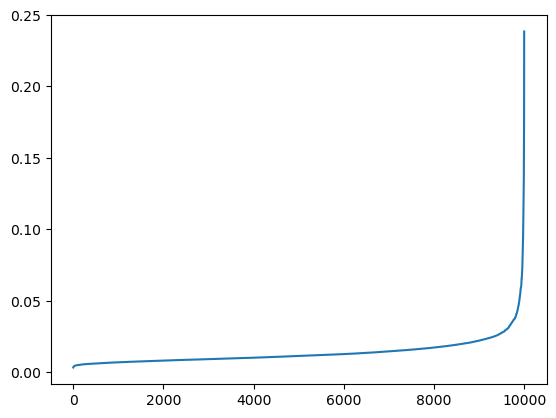

In [108]:
#finally we plot the distance in ascending order

plt.plot(furthest_distance)       

INTERESTING OBSERVATION TO NOTE THAT EVEN THOUGH THE ELBOW IS SOMEWHAT AT 0.05 ,I GET BETTER RESULTS BY SETTING EPSILON VALUE TO 0.4

In [134]:
from sklearn.cluster import DBSCAN

model=DBSCAN(eps=0.4,min_samples=6)

model.fit(PCA_df)






DBSCAN(eps=0.4, min_samples=6)

In [135]:
model.labels_

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [136]:
#LETS CHECK SILHOUETTE SCORE FOR THE MODEL

from sklearn.metrics import silhouette_score


labels=model.fit_predict(PCA_df)

score=silhouette_score(PCA_df,labels)


In [137]:
score

0.5128760210125093

In [138]:
np.unique(labels)

array([0, 1, 2, 3, 4], dtype=int64)

In [139]:
df_copy["dbscan_cluster_label"]=labels



In [140]:
df_copy["dbscan_cluster_label"].value_counts()

0    6319
1    2251
2    1062
4     200
3     168
Name: dbscan_cluster_label, dtype: int64

# ANALYSIS OF DBSCAN CLUSTERING

THUS IN CASE OF DBSCAN 5 CLUSTERS HAVE BEEN FORMED 